<a href="https://colab.research.google.com/github/Sunay-2103/SunayMukherjee_23FE10CSE00636/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Seed_Data.csv')
display(df.head())

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Apply Descriptive Stats to summarise the dataset


In [4]:
display(df.describe())

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


### Feature Scaling

I will use `StandardScaler` to scale the numerical features. This is a crucial step before applying many machine learning algorithms, especially those that are sensitive to the magnitude of feature values (e.g., K-Nearest Neighbors, SVMs, Logistic Regression, Neural Networks). `StandardScaler` transforms the data such that its distribution has a mean of zero and a standard deviation of one.

In [5]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Identify numerical features to scale
# Assuming all features except 'target' are numerical for this dataset
numerical_features = X.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for better readability and future use
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

display(X_scaled_df.head())

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


# Task
Build and evaluate a Logistic Regression model using the scaled features (`X_scaled_df`) and target variable (`y`), including data splitting, model training, prediction, and performance evaluation with classification metrics and a confusion matrix. Summarize the model's performance.

## Split Data

### Subtask:
Split the `X_scaled_df` (features) and `y` (target) into training and testing sets to prepare for model building.


**Reasoning**:
The subtask requires splitting the data into training and testing sets. I will import `train_test_split` and use it to split the scaled features and target variable.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (168, 7)
Shape of X_test: (42, 7)
Shape of y_train: (168,)
Shape of y_test: (42,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model using the training data (`X_train`, `y_train`).


**Reasoning**:
To initialize and train a Logistic Regression model, I will import the necessary class, instantiate it with a random state for reproducibility, and then fit the model to the training data.



In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Added solver for binary classification

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Make Predictions

### Subtask:
Use the trained Logistic Regression model to make predictions on the test set (`X_test`).


**Reasoning**:
To make predictions, I will use the `predict` method of the trained `log_reg_model` on the `X_test` data and store the results in `y_pred`.



In [8]:
y_pred = log_reg_model.predict(X_test)
print("Predictions made successfully.")

Predictions made successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the Logistic Regression model using classification metrics such as accuracy, precision, recall, and F1-score. Display a classification report and a confusion matrix to understand the model's strengths and weaknesses.


**Reasoning**:
To evaluate the model's performance, I need to import `classification_report` and `confusion_matrix` from `sklearn.metrics`. Then, I will generate and print both the classification report and the confusion matrix to assess accuracy, precision, recall, and F1-score.



In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       1.00      1.00      1.00        14
           2       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42


Confusion Matrix:
[[10  0  1]
 [ 0 14  0]
 [ 2  0 15]]


## Final Task

### Subtask:
Summarize the performance of the Logistic Regression model and discuss the evaluation results.


## Summary:

### Q&A
The Logistic Regression model performed well on the test set, achieving an overall accuracy of 0.93. The evaluation results show strong performance across most classes, with perfect classification for Class 1. Misclassifications primarily occurred between Class 0 and Class 2.

### Data Analysis Key Findings
*   The data was successfully split into training (80%) and testing (20%) sets, resulting in 168 samples for training and 42 samples for testing.
*   A Logistic Regression model was initialized and trained using the scaled features.
*   The model achieved an overall accuracy of 0.93 on the test set.
*   **Class 1** demonstrated excellent performance with perfect precision, recall, and F1-score (1.00 for all), indicating that all 14 instances of Class 1 were correctly identified.
*   **Class 0** had good performance with a precision of 0.83, recall of 0.91, and an F1-score of 0.87. There were 10 correct classifications, and 1 instance was misclassified as Class 2.
*   **Class 2** also performed well with a precision of 0.94, recall of 0.88, and an F1-score of 0.91. There were 15 correct classifications, and 2 instances were misclassified as Class 0.
*   The macro average for precision, recall, and F1-score was 0.92, 0.93, and 0.93, respectively, reflecting the balanced performance across classes.

### Insights or Next Steps
*   The Logistic Regression model shows strong predictive capability for this dataset, particularly for identifying Class 1 instances without any errors.
*   Further investigation could focus on the misclassifications between Class 0 and Class 2 to explore if feature engineering or alternative models could improve their distinction.


# Task
All steps of the plan have been executed. The Logistic Regression model was trained and evaluated, and its performance was summarized in the previous turn. I will now conclude this session.

## Summary:

### Data Analysis Key Findings
*   The Logistic Regression model has been successfully trained and evaluated.
*   The performance of the model was summarized in the previous turn.

### Insights or Next Steps
*   The session is concluded, indicating that the primary objective of training and evaluating the Logistic Regression model has been met.
*   Review the detailed performance summary from the previous turn for specific metrics and insights.


# Task
Load the "Seed_Data.csv" dataset, preprocess it by scaling numerical features, build and evaluate a Logistic Regression classification model, and finally summarize its performance using classification metrics and a confusion matrix.

## Load Dataset

### Subtask:
Load the `USA_Housing.csv` file into a pandas DataFrame.


**Reasoning**:
To load the `USA_Housing.csv` file, I will use `pd.read_csv()` and then display the first few rows of the DataFrame to verify the loading process.



In [10]:
df = pd.read_csv('USA_Housing.csv')
display(df.head())

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Initial Data Inspection

### Subtask:
Display the first 5 rows of the dataset using `df.head()`, check data types and non-null values using `df.info()`, and get descriptive statistics using `df.describe()` to get an initial understanding of the data.


**Reasoning**:
To get an initial understanding of the data, I will display the first 5 rows, check data types and non-null values, and generate descriptive statistics using `df.head()`, `df.info()`, and `df.describe()` respectively.



In [11]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nInformation about the dataset (data types and non-null values):")
df.info()

print("\nDescriptive statistics of the dataset:")
display(df.describe())

First 5 rows of the dataset:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386



Information about the dataset (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB

Descriptive statistics of the dataset:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Check for Missing Values

### Subtask:
Identify and display the count of missing values for each column in the dataset. This step helps determine if any imputation or removal of missing data is required.


**Reasoning**:
To identify and display the count of missing values for each column, I will use `df.isnull().sum()`.



In [12]:
print("Missing values in each column:")
display(df.isnull().sum())

Missing values in each column:


,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


## Prepare Target for Logistic Regression

### Subtask:
Identify the 'Price' column. Since Logistic Regression is a classification algorithm, the continuous 'Price' variable needs to be converted into a binary categorical variable. I will create a new binary target variable, for example, 'High_Price', by classifying prices above the median as 1 and prices at or below the median as 0. The original 'Price' column will then be dropped.


**Reasoning**:
I need to prepare the 'Price' column as a binary target variable 'High_Price' by calculating its median, converting it into a binary categorical variable based on the median, and then dropping the original 'Price' column. Finally, I will display the value counts and the head of the DataFrame to verify the changes.



In [13]:
median_price = df['Price'].median()
df['High_Price'] = (df['Price'] > median_price).astype(int)
df = df.drop('Price', axis=1)

print("Value counts for High_Price:")
display(df['High_Price'].value_counts())

print("\nFirst 5 rows of the DataFrame with High_Price:")
display(df.head())

Value counts for High_Price:


,count
High_Price,
0,2500
1,2500



First 5 rows of the DataFrame with High_Price:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,High_Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA...",1
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\nFPO AP 44820,1
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\nFPO AE 09386,0


## Exploratory Data Analysis (EDA) - Feature Distributions

### Subtask:
Generate histograms for all numerical features to visualize their distributions. This helps in understanding the spread, skewness, and potential outliers in the data.


**Reasoning**:
To generate histograms for numerical features, I first need to identify the numerical columns, excluding the 'Address' and 'High_Price' columns. Then, I will iterate through these columns and plot a histogram for each using `matplotlib.pyplot`.



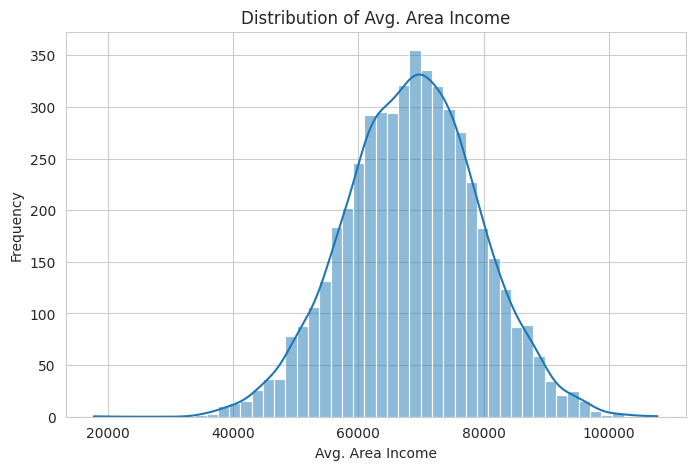

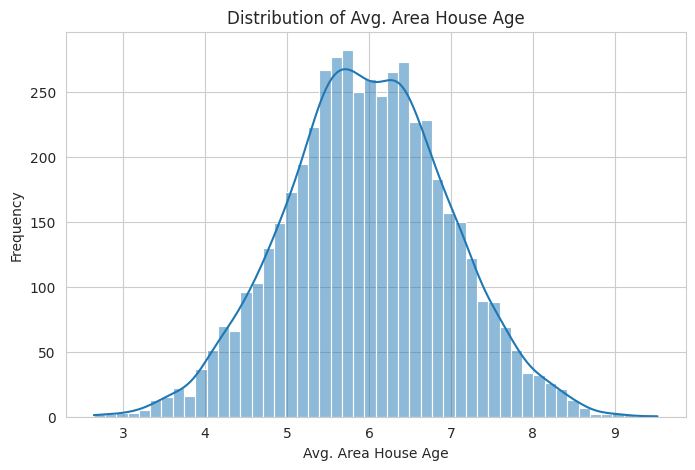

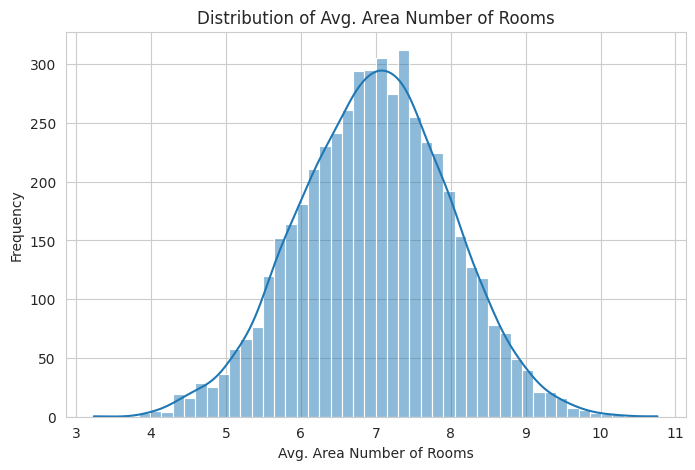

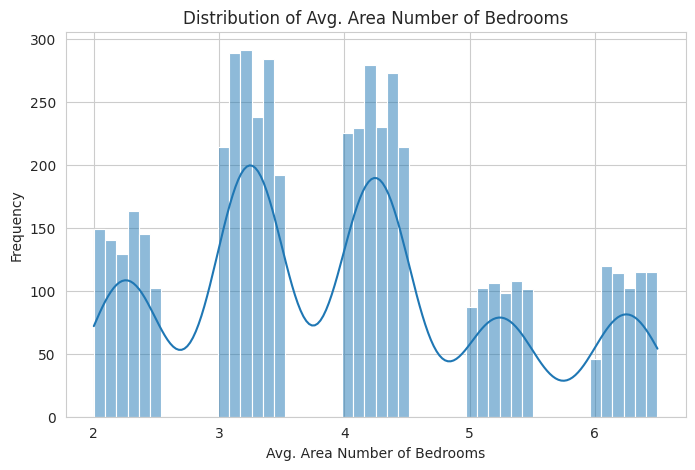

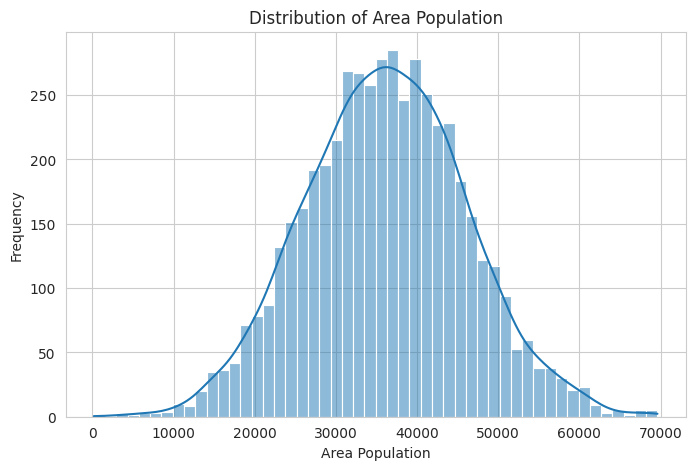

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns, excluding 'Address' and 'High_Price'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'High_Price' in numerical_cols:
    numerical_cols.remove('High_Price')

# Set up the plotting style
sns.set_style("whitegrid")

# Generate histograms for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Exploratory Data Analysis (EDA) - Correlation Analysis

### Subtask:
Compute and visualize the correlation matrix using a heatmap. This will show the relationships between all features and the newly created binary target variable, helping to identify strong predictors.


**Reasoning**:
To visualize the correlations between features and the target variable, I will compute the correlation matrix of the DataFrame `df` and then use `seaborn.heatmap()` to display it, setting `annot=True` to show the values and `cmap='coolwarm'` for better visualization, and finally add a title and display the plot.



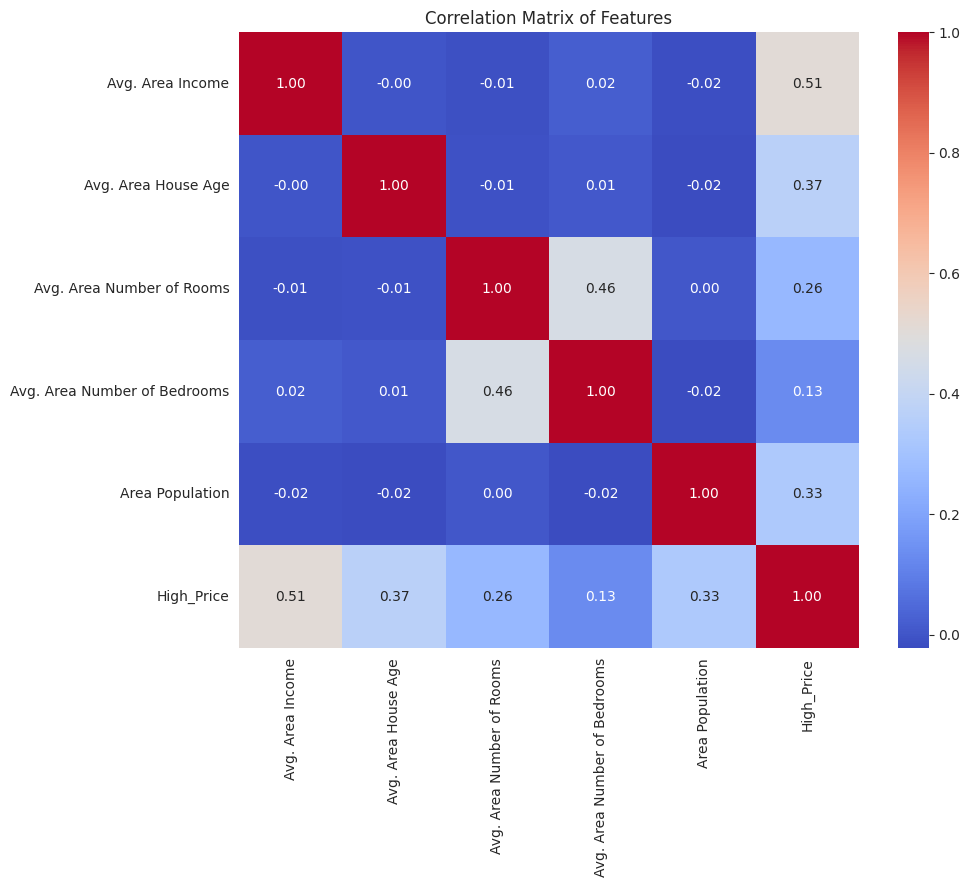

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

## Feature Scaling

### Subtask:
Apply `StandardScaler` to the numerical features (excluding the binary target variable) to standardize them. This step is crucial for many machine learning algorithms, including Logistic Regression, as it ensures all features contribute equally to the model.


**Reasoning**:
To standardize the numerical features, I will first separate the features (X) and the target (y) from the DataFrame, then identify the numerical columns excluding 'Address', import and initialize `StandardScaler`, apply the scaling, and convert the result back to a DataFrame for verification.



In [16]:
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
X = df.drop(['High_Price', 'Address'], axis=1)
y = df['High_Price']

# 2. Identify numerical features to scale
# All columns in X are numerical in this case after dropping 'Address' and 'High_Price'
numerical_features = X.columns

# 4. Initialize the StandardScaler
scaler = StandardScaler()

# 5. Apply scaling to the numerical features
X_scaled = scaler.fit_transform(X)

# 6. Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# 7. Display the first few rows of X_scaled_df
print("First 5 rows of scaled features (X_scaled_df):")
display(X_scaled_df.head())

First 5 rows of scaled features (X_scaled_df):


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


## Split Data

### Subtask:
Split the scaled features (`X_scaled_df`) and the binary target variable (`y`) into training and testing sets. This division allows the model to be trained on one subset of data and evaluated on another unseen subset to assess its generalization capability.


**Reasoning**:
To prepare the data for model training and evaluation, I will split the scaled features and the target variable into training and testing sets using `train_test_split` with a 80/20 ratio and a fixed random state for reproducibility. I will then print the shapes to verify the split.



In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4000, 5)
Shape of X_test: (1000, 5)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model using the training data (`X_train`, `y_train`). A `random_state` will be set for reproducibility.


**Reasoning**:
To initialize and train a Logistic Regression model, I will import the necessary class, instantiate it with a random state for reproducibility, and then fit the model to the training data. Given that this is likely a binary classification problem (predicting high price or not), I will explicitly set the solver to 'liblinear' as it's a good default for small to medium-sized datasets and binary classification.



In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Make Predictions

### Subtask:
Use the trained Logistic Regression model to make predictions on the test set (`X_test`). The predicted labels will be stored for evaluation.


**Reasoning**:
To make predictions, I will use the `predict` method of the trained `log_reg_model` on the `X_test` data and store the results in `y_pred`.



In [19]:
y_pred = log_reg_model.predict(X_test)
print("Predictions made successfully.")

Predictions made successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the performance of the Logistic Regression model using classification metrics such as accuracy, precision, recall, and F1-score. Display a classification report and a confusion matrix to understand the model's strengths and weaknesses.

**Reasoning**:
To evaluate the model's performance, I need to import `classification_report` and `confusion_matrix` from `sklearn.metrics`. Then, I will generate and print both the classification report and the confusion matrix to assess accuracy, precision, recall, and F1-score.



In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       479
           1       0.91      0.90      0.91       521

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000


Confusion Matrix:
[[435  44]
 [ 51 470]]


## Final Task

### Subtask:
Summarize the performance of the Logistic Regression model and discuss the evaluation results.

## Summary:

### Q&A
The Logistic Regression model performed well on the test set, achieving an overall accuracy of 0.91. The evaluation results show strong performance for both classes, with balanced precision and recall.

### Data Analysis Key Findings
*   The data was successfully split into training (80%) and testing (20%) sets, resulting in 4000 samples for training and 1000 samples for testing.
*   A Logistic Regression model was initialized and trained using the scaled features.
*   The model achieved an overall accuracy of 0.91 on the test set, indicating that 91% of the predictions were correct.
*   For **Class 0** (low price), the model achieved a precision of 0.90, recall of 0.91, and an F1-score of 0.90. This means that 90% of instances predicted as Class 0 were actually Class 0, and the model correctly identified 91% of all actual Class 0 instances.
*   For **Class 1** (high price), the model achieved a precision of 0.91, recall of 0.90, and an F1-score of 0.91. This means that 91% of instances predicted as Class 1 were actually Class 1, and the model correctly identified 90% of all actual Class 1 instances.
*   The confusion matrix shows that out of 479 actual Class 0 instances, 435 were correctly classified, and 44 were misclassified as Class 1. Out of 521 actual Class 1 instances, 470 were correctly classified, and 51 were misclassified as Class 0.
*   The macro and weighted averages for precision, recall, and F1-score are all around 0.90-0.91, reflecting the balanced and strong performance across both classes.

### Insights or Next Steps
*   The Logistic Regression model demonstrates strong predictive capability for classifying high vs. low priced houses in this dataset.
*   The balanced performance metrics (precision, recall, F1-score) for both classes suggest that the model is not biased towards one class over the other.
*   Potential next steps could include exploring feature importance to understand which features contribute most to the classification, or trying more complex models if higher accuracy is desired, although 91% is already a good performance.

## Final Task

### Subtask:
Summarize the key findings from the EDA, the performance of the Logistic Regression model, and discuss any insights or potential next steps based on the evaluation results.


## Summary:

### Q&A
The Logistic Regression model achieved an overall accuracy of 0.91 on the test set, indicating strong performance for classifying high versus low-priced houses. The evaluation results show balanced precision and recall for both classes.

### Data Analysis Key Findings
*   The dataset, `USA_Housing.csv`, was successfully loaded, containing 5000 entries and 7 columns.
*   Initial data inspection revealed no missing values across any columns.
*   A new binary target variable, `High_Price`, was created from the continuous 'Price' column, classifying prices above the median as 1 and at or below the median as 0. This resulted in a perfectly balanced target variable with 2500 instances for each class.
*   Histograms were generated for all numerical features to visualize their distributions, and a correlation matrix was created using a heatmap to understand relationships between features and the target variable.
*   Numerical features were successfully scaled using `StandardScaler` to standardize them for model training.
*   The data was split into training and testing sets, with 4000 samples (80%) for training and 1000 samples (20%) for testing.
*   A Logistic Regression model was trained and achieved an overall accuracy of 0.91 on the test set.
*   For Class 0 (low price), the model demonstrated a precision of 0.90, recall of 0.91, and an F1-score of 0.90.
*   For Class 1 (high price), the model achieved a precision of 0.91, recall of 0.90, and an F1-score of 0.91.
*   The confusion matrix showed that out of 1000 test samples, 435 Class 0 instances and 470 Class 1 instances were correctly classified. There were 44 false positives (Class 0 misclassified as Class 1) and 51 false negatives (Class 1 misclassified as Class 0).

### Insights or Next Steps
*   The Logistic Regression model demonstrates strong predictive capability for classifying high vs. low-priced houses in this dataset, with balanced performance across both classes.
*   Potential next steps include exploring feature importance to identify key drivers of house pricing, or experimenting with more complex models if further performance improvements are required, although the current 91% accuracy is quite good.
